# YOLOV5 Assignment
Name: Begad Tamim  
Regnum: 211002177

# Exercise 1: Modify Code to Display Specific Classes
Modify the detection code to filter and display only specific classes such as 'person' or 'car'.

In [13]:
import os
import cv2
import time
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import display, Image
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset

In [14]:
# Load the pre-trained model and the class labels
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
CLASSES = model.names

Using cache found in C:\Users\begad/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-13 Python-3.11.9 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [15]:
# Function to filter and display specific classes
def filter_and_display_classes(image, target_classes):
    results = model(image)
    detections = results.xyxy[0].cpu().numpy()

    for detection in detections:
        xmin, ymin, xmax, ymax, confidence, class_id = detection
        if confidence > 0.5 and CLASSES[int(class_id)] in target_classes:
            label = f"{CLASSES[int(class_id)]}: {confidence:.2f}%"
            cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            cv2.putText(image, label, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

In [16]:
# List to store the input images
image_paths = ['yolov5/data/images/zidane.jpg', 'yolov5/data/images/bus.jpg', 'yolov5\data\images\monkey_car.png']

# Specify the target classes
target_classes = ['person', 'car']

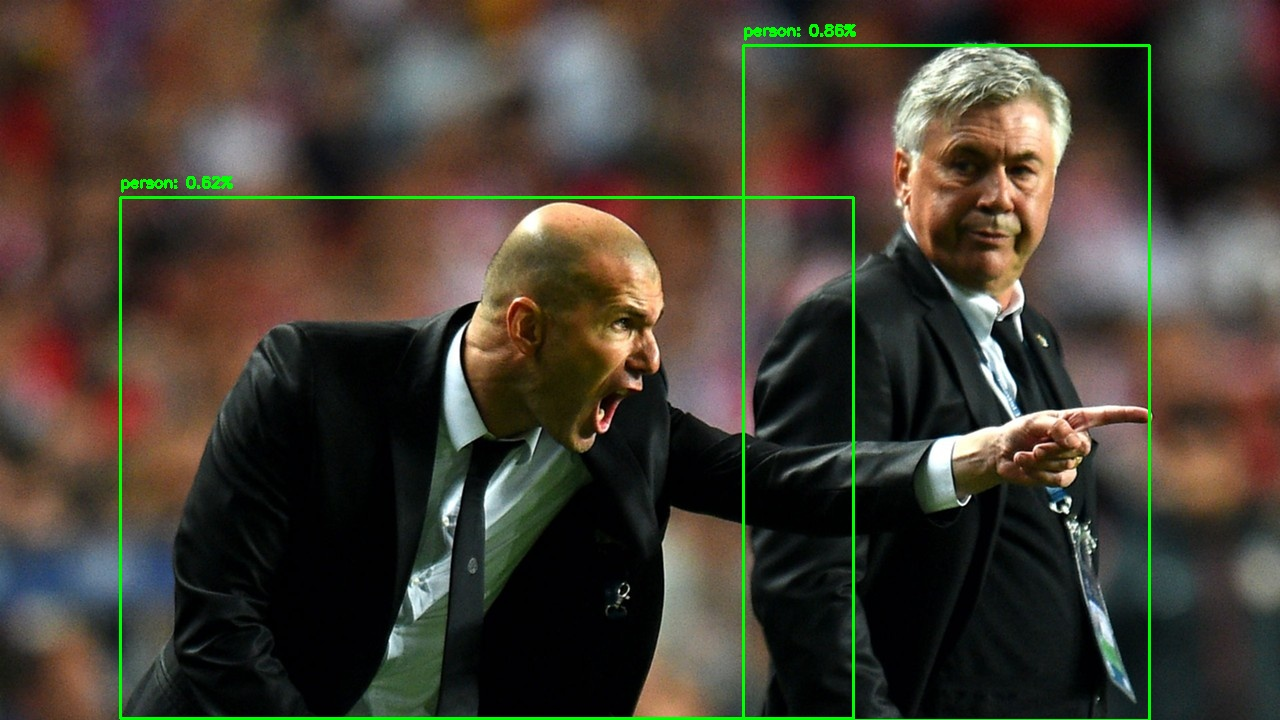

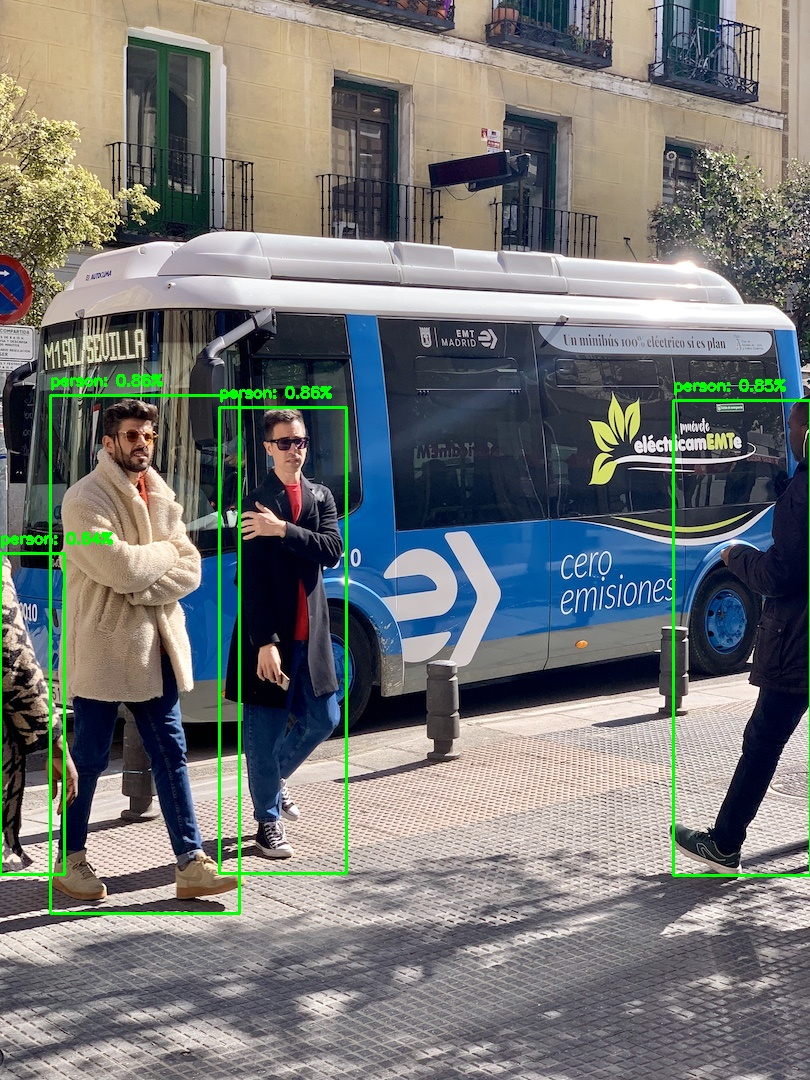

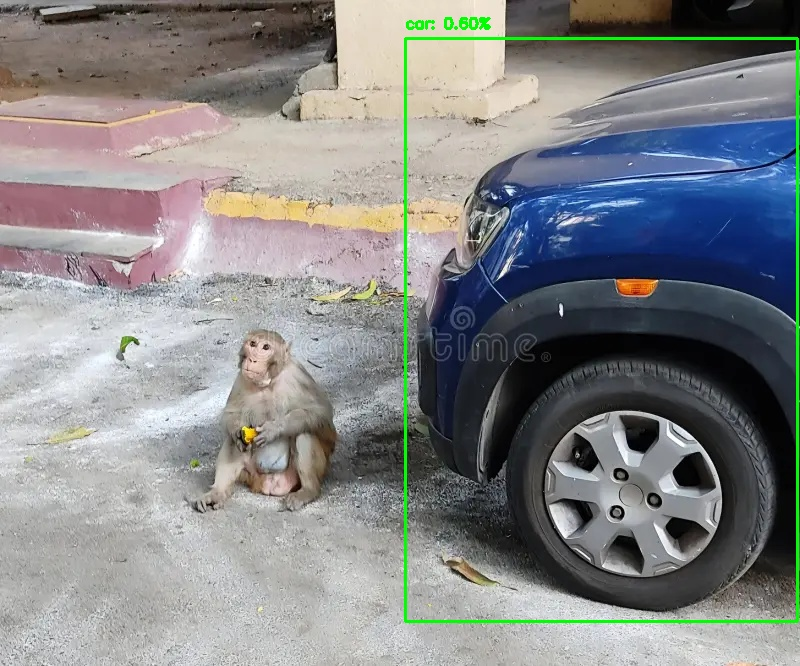

In [22]:
# List to store the output images
image1 = Image(filename=r'C:\Users\begad\OneDrive\Term 7\Computer Vision\Assignments\YoloV5 Assignment\output_image_1.jpg')
image2 = Image(filename=r'C:\Users\begad\OneDrive\Term 7\Computer Vision\Assignments\YoloV5 Assignment\output_image_2.jpg')
image3 = Image(filename=r'C:\Users\begad\OneDrive\Term 7\Computer Vision\Assignments\YoloV5 Assignment\output_image_3.jpg')

# Display the images
display(image1, image2, image3)

# Exercise 2: Fine Tune YOLOv5
Train YOLOv5 on a custom dataset by following the YOLOv5 fine-tuning instructions.

In [ ]:
# Train YOLOv5 on custom dataset
!python yolov5/train.py --img 640 --batch 16 --epochs 7 --data "C:\Users\begad\OneDrive\Term 7\Computer Vision\Assignments\YoloV5 Assignment\person-car.v2i.yolov5pytorch\data.yaml" --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=C:\Users\begad\OneDrive\Term 7\Computer Vision\Assignments\YoloV5 Assignment\person-car.v2i.yolov5pytorch\data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=7, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\begad\OneDrive\Term': No such file or directory
YOLOv5  2024-12-13 Python-3.11.9 torch-2.5.1+cpu CPU

h

In [1]:
# Making sure that the directory is in the yolov5 directory
%cd yolov5

# Run inference on the validation images
!python detect.py --weights runs/train/exp9/weights/best.pt --img 640 --conf 0.25 --source "C:/Users/begad/OneDrive/Term 7/Computer Vision/Assignments/YoloV5 Assignment/person-car.v2i.yolov5pytorch/valid/images"

c:\Users\begad\OneDrive\Term 7\Computer Vision\Assignments\YoloV5 Assignment\yolov5


C:\Users\begad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
detect: weights=['runs/train/exp9/weights/best.pt'], source=C:/Users/begad/OneDrive/Term 7/Computer Vision/Assignments/YoloV5 Assignment/person-car.v2i.yolov5pytorch/valid/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\begad\OneDrive\Term': No such file or directory
YOLOv5  2

Selected images: ['runs/detect/exp16\\252_jpg.rf.ed48bf0397bb008dadd279367307117f.jpg', 'runs/detect/exp16\\57_jpg.rf.f8cef46342af915fdc95dfa18f32a8b1.jpg', 'runs/detect/exp16\\299_jpg.rf.ac7f835e5913b31a19cceef5569b2323.jpg']


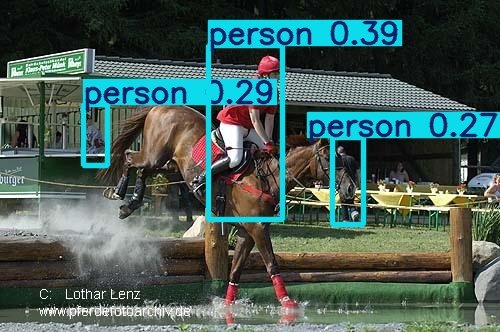

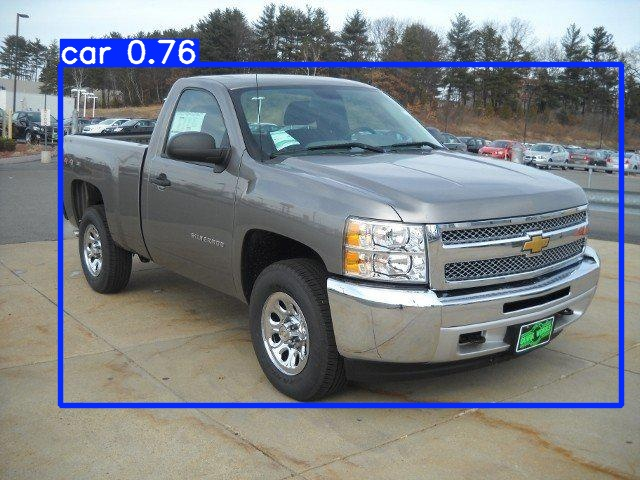

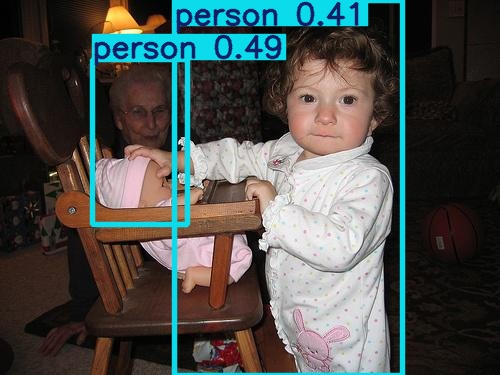

In [12]:
# Check if images are found
if not result_images:
    print("No images found in the specified directory.")
else:
    # Select 3 random images
    random_images = random.sample(result_images, 3)
    print("Selected images:", random_images)  # Debugging step
    
    # Display the random images using IPython Image
    for image_path in random_images:
        display(Image(filename=image_path))